# Your info

Full name:Ali Sedaghi

Student ID:97521378

# Q1. Perceptron

In [1]:
# Q1_graded

# Imports

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

In [2]:
# Q1_graded

# Utility functions

def sigmoid(x):
  return 1. / (1 + np.exp(-x))

def predict(x, w, b):
  return sigmoid(np.dot(w, x) + b)

def CEE(y_predict, y):
  m = y.shape[1]
  loss = -1 * (y * np.log(y_predict) + (1 - y) * np.log(1 - y_predict))
  cost = (1 / m) * np.sum(loss)
  return loss, cost

def MSE(y_predict, y):
  m = y.shape[1]
  loss = 1/2 * (y_predict - y)**2
  cost = (1 / m) * np.sum(loss)
  return loss, cost

def computeAccuracy(y_predict, y):
  return 100 - np.mean(np.abs(y_predict - y)) * 100

In [3]:
# Q1_graded

# 1 Layer perceptron with batch gradient descent

def perceptron(x, y, learning_rate, iterations, iter_log):
  # Get dimensionals
  feat, m = x.shape

  # Init parameters
  # In 1 layer NN initializing parameters to 0 or random doesn't matter
  w = np.random.randn(1, feat) * 0.01
  b = np.random.randn() * 0.01
  costs = []
  accuracies = []
  
  # Batch Gradient Descent
  for i in range(iterations):
    # Forward propagation
    y_predict = predict(x, w, b)

    # Cost and Accuracy
    difference = y_predict - y
    loss, cost = CEE(y_predict, y)
    costs.append(cost)
    accuracy = computeAccuracy(y_predict, y)
    accuracies.append(accuracy)

    # Backward propagation
    dw = difference * x
    db = difference
    dW = (1 / m) * np.sum(dw, axis=1)
    dB = (1 / m) * np.sum(db, axis=1)
  
    # Update parameters
    w -= learning_rate * dW
    b -= learning_rate * dB

    # Print cost and accuracy
    if (not iter_log == 0) and (i % iter_log == 0 or i == iterations - 1):
      print('Iteration:', i, '  cost:', cost, ' accuracy:', accuracy)

  report = {
      'costs': costs,
      'accuracies': accuracies
  }

  return w, b, report

In [4]:
# Q1_graded

# Data preprocessing

x_train = np.array([
  [0.0, 0.0, 1.0, 1.0], # Input feature x1
  [0.0, 1.0, 0.1, 1.0], # Input feature x2
])

y_train = np.array([
  [1.0, 0.0, 0.0, 0.0]
])

print(x_train.shape)
print(y_train.shape)

(2, 4)
(1, 4)


In [5]:
# Q1_graded

# Training

LEARNING_RATE = 0.4
N_EPOCH = 2000
REPORT_MOD = 100

w, b, report = perceptron(x_train, y_train, LEARNING_RATE, N_EPOCH, REPORT_MOD)
y_predict = predict(x_train, w, b)

Iteration: 0   cost: 0.6942907673465892  accuracy: 49.94327126977759
Iteration: 100   cost: 0.1720877239902287  accuracy: 85.11776563650365
Iteration: 200   cost: 0.10082973695097004  accuracy: 90.72794169583425
Iteration: 300   cost: 0.07024261807555526  accuracy: 93.37266143644224
Iteration: 400   cost: 0.05353838213164729  accuracy: 94.87789934718194
Iteration: 500   cost: 0.04310556929937227  accuracy: 95.84014174689098
Iteration: 600   cost: 0.0360051395636002  accuracy: 96.5048555366632
Iteration: 700   cost: 0.030875421050974364  accuracy: 96.9900637260782
Iteration: 800   cost: 0.027003293427662337  accuracy: 97.35910224139988
Iteration: 900   cost: 0.023980700203902437  accuracy: 97.64884472764295
Iteration: 1000   cost: 0.021557925975917252  accuracy: 97.88214949685398
Iteration: 1100   cost: 0.019573880058338777  accuracy: 98.0739105468243
Iteration: 1200   cost: 0.01792012957513101  accuracy: 98.23423355842537
Iteration: 1300   cost: 0.016521085260455922  accuracy: 98.37020

In [6]:
# Q1_graded

# Report

print("w: ", w)
print("b: ", b)
print("Predicted Output: ", np.around(y_predict, 3))

w:  [[-7.55667535 -8.38305651]]
b:  [3.71753195]
Predicted Output:  [[0.976 0.009 0.009 0.   ]]


# Q2. Binary Classification

In [7]:
# Q2_graded

# Imports

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

In [8]:
# Q2_graded

# Utility functions

def sigmoid(x):
  return 1. / (1 + np.exp(-x))

def predict(x, w, b):
  return sigmoid(np.dot(w, x) + b)

def CEE(y_predict, y):
  m = y.shape[1]
  loss = -1 * (y * np.log(y_predict) + (1 - y) * np.log(1 - y_predict))
  cost = (1 / m) * np.sum(loss)
  return loss, cost

def MSE(y_predict, y):
  m = y.shape[1]
  loss = 1/2 * (y_predict - y)**2
  cost = (1 / m) * np.sum(loss)
  return loss, cost

def computeAccuracy(y_predict, y):
  return 100 - np.mean(np.abs(y_predict - y)) * 100

In [9]:
# Q2_graded

# 1 Layer perceptron with batch gradient descent

def perceptron(x, y, learning_rate, iterations, iter_log):
  # Get dimensionals
  feat, m = x.shape

  # Init parameters
  # In 1 layer NN initializing parameters to 0 or random doesn't matter
  w = np.random.randn(1, feat) * 0.01
  b = np.random.randn() * 0.01
  costs = []
  accuracies = []
  
  # Batch Gradient Descent
  for i in range(iterations):
    # Forward propagation
    y_predict = predict(x, w, b)

    # Cost and Accuracy
    difference = y_predict - y
    loss, cost = CEE(y_predict, y)
    costs.append(cost)
    accuracy = computeAccuracy(y_predict, y)
    accuracies.append(accuracy)

    # Backward propagation
    dw = difference * x
    db = difference
    dW = (1 / m) * np.sum(dw, axis=1)
    dB = (1 / m) * np.sum(db, axis=1)
  
    # Update parameters
    w -= learning_rate * dW
    b -= learning_rate * dB

    # Print cost and accuracy
    if (not iter_log == 0) and (i % iter_log == 0 or i == iterations - 1):
      print('Iteration:', i, '  cost:', cost, ' accuracy:', accuracy)

  report = {
      'costs': costs,
      'accuracies': accuracies
  }

  return w, b, report

In [10]:
# Q2_graded

# Loading and preprocessing data

x1, x2, y = np.loadtxt("/content/sample_data/data.txt", delimiter = ",", unpack=True)
N_TRAIN = y.shape[0]

x = np.concatenate((x1.reshape(1, N_TRAIN), x2.reshape(1, N_TRAIN)), axis=0)
y_train = y.reshape(1, N_TRAIN)

# Normalize and Standardlize data
x_train = x - np.mean(x, axis=1, keepdims=True)
x_train /= np.std(x_train, axis=1, keepdims=True)

In [11]:
# Q2_graded

# Training

LEARNING_RATE = 0.1
N_EPOCH = 2000
REPORT_MOD = 100

w, b, report = perceptron(x_train, y_train, LEARNING_RATE, N_EPOCH, REPORT_MOD)
y_predict = predict(x_train, w, b)
print("w: ", w)
print("b: ", b)

Iteration: 0   cost: 0.6997386323358503  accuracy: 49.67247287024825
Iteration: 100   cost: 0.3293826347925193  accuracy: 74.41222068955283
Iteration: 200   cost: 0.28453972086161355  accuracy: 78.54778988687043
Iteration: 300   cost: 0.26731348196643545  accuracy: 80.34406593742705
Iteration: 400   cost: 0.2583970165500285  accuracy: 81.38075353977132
Iteration: 500   cost: 0.25308964091601355  accuracy: 82.06551820535782
Iteration: 600   cost: 0.24966168417320977  accuracy: 82.55496850926953
Iteration: 700   cost: 0.24732558397132554  accuracy: 82.92337004643952
Iteration: 800   cost: 0.2456720480640157  accuracy: 83.21093285250768
Iteration: 900   cost: 0.24446820914466416  accuracy: 83.44151884736732
Iteration: 1000   cost: 0.24357254123172753  accuracy: 83.6302758630361
Iteration: 1100   cost: 0.24289460549305741  accuracy: 83.78733046212385
Iteration: 1200   cost: 0.24237428771288042  accuracy: 83.91973575102769
Iteration: 1300   cost: 0.2419703447807143  accuracy: 84.03257063327

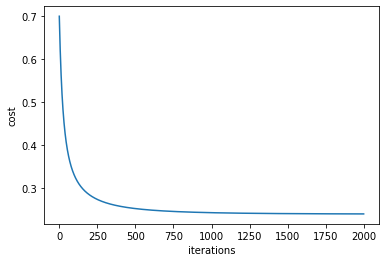

In [12]:
# Q2_graded

# Cost plot

plt.plot(report['costs'])
plt.ylabel('cost')
plt.xlabel('iterations')
plt.show()

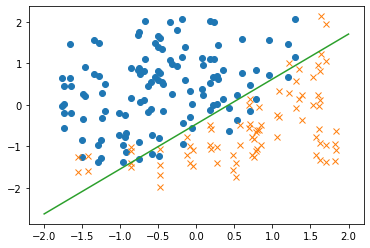

In [13]:
# Q2_graded

# Learned function plot

fig, ax = plt.subplots() 

o_points = x_train.T[y_train.T[:, 0] == 1]
x_points = x_train.T[y_train.T[:, 0] == 0]

ax.plot(o_points[:, 0], o_points[:, 1], 'o')
ax.plot(x_points[:, 0], x_points[:, 1], 'x')

x =  np.arange(-2, 3)
ax.plot(x, ((b + w[0][0] * x) / (-w[0][1])))

fig.show()

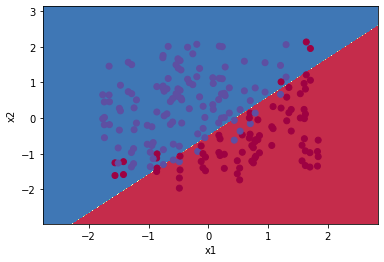

In [14]:
# Q2_graded

# Another plot
# Inspired by coursera deep learning notebooks

import sklearn.linear_model

clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(x_train.T, y_train.T.reshape(N_TRAIN,));

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

plot_decision_boundary(lambda x: clf.predict(x), x_train, y_train)

# Q4. MLP

In [15]:
# Q4_graded

# Imports

from keras.layers import *
from keras.optimizers import *
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Q4_graded

# Load dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [17]:
# Q4_graded

# Global constants

N_TRAIN, HEIGHT, WIDTH = x_train.shape
N_TEST = x_test.shape[0]

N_FEATURE = WIDTH * HEIGHT
N_HIDDEN = 128
N_CLASS = 10

LOSS = 'categorical_crossentropy'
OPTIMIZER = SGD()
METRICS = ['accuracy']

N_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
VALIDATION_SPLIT = 0.2

In [18]:
# Q4_graded

# Data preprocessing

x_train_flatten = x_train.reshape(N_TRAIN, -1)
y_train_flatten = y_train.reshape(N_TRAIN, -1)
x_test_flatten = x_test.reshape(N_TEST, -1)
y_test_flatten = y_test.reshape(N_TEST, -1)

# Normalize data
X_train = x_train_flatten.astype('float32') / 255
X_test = x_test_flatten.astype('float32') / 255

# Categorize output into 10 classes
Y_train = np_utils.to_categorical(y_train_flatten, N_CLASS)
Y_test = np_utils.to_categorical(y_test_flatten, N_CLASS)

In [19]:
# Q4_graded

# Model defining

model = Sequential()

# Input layer
model.add(Dense(N_HIDDEN, input_shape=(N_FEATURE,)))
model.add(Activation('relu'))

# Hidden layer
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))

# Output layer
model.add(Dense(N_CLASS))
model.add(Activation('softmax'))

model.summary

model.compile(
  loss = LOSS,
  optimizer = OPTIMIZER,
  metrics = METRICS
)

In [20]:
# Q4_graded

# Training and reports

history = model.fit(
  X_train, Y_train,
  batch_size = BATCH_SIZE,
  epochs = N_EPOCH,
  verbose = VERBOSE,
  validation_split = VALIDATION_SPLIT
)

Epoch 1/20
375/375 [==============================] - 3s 5ms/step - loss: 1.9325 - accuracy: 0.4239 - val_loss: 0.7628 - val_accuracy: 0.8362
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6799 - accuracy: 0.8378 - val_loss: 0.4526 - val_accuracy: 0.8858
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.4600 - accuracy: 0.8767 - val_loss: 0.3724 - val_accuracy: 0.9002
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3883 - accuracy: 0.8925 - val_loss: 0.3346 - val_accuracy: 0.9071
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3571 - accuracy: 0.8992 - val_loss: 0.3112 - val_accuracy: 0.9132
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3224 - accuracy: 0.9100 - val_loss: 0.2942 - val_accuracy: 0.9183
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3076 - accuracy: 0.9119 - val_loss: 0.2805 - val_accuracy: 0.9214
Epoch 

In [21]:
# Q4_graded

# Evaluate on test data

score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.1908 - accuracy: 0.9454
Test score: 0.19083556532859802
Test accuracy: 0.9453999996185303


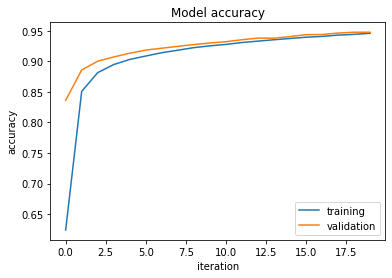

In [22]:
# Q4_graded

# Accuracy plot

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

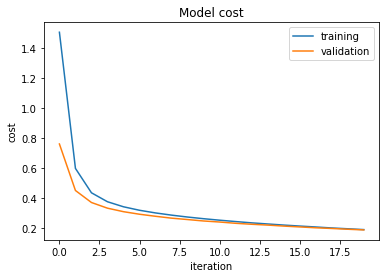

In [23]:
# Q4_graded

# Cost plot

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model cost')
plt.ylabel('cost')
plt.xlabel('iteration')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

# Q5. Back-Propagation

In [24]:
# Q5_graded

# Imports

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

In [25]:
# Q5_graded

# Activation functions

def relu(Z):
  # Z as cache
  A = np.maximum(0, Z)
  return A, Z

def reluBackward(dA, cache):
  Z = cache
  dZ = np.array(dA, copy=True)
  dZ[Z <= 0] = 0
  return dZ

def sigmoid(Z):
  # Z as cache
  A = 1. / (1 + np.exp(-Z))
  return A, Z

def sigmoidBackward(dA, cache):
  Z = cache
  s = 1 / (1 + np.exp(-Z))
  dZ = dA * s * (1 - s)
  return dZ

def softmax(Z):
  # Z as cache
  Z = Z - np.max(Z, axis=0, keepdims=True)
  exponents = np.exp(Z)
  A = exponents / np.sum(exponents, axis=0, keepdims=True)
  return A, Z

def softmaxBackward(dA, cache):
  Z = cache
  s, cache = softmax(Z)
  dZ = dA * s * (1 - s)
  return dZ

In [26]:
# Q5_graded

# Cost and Accuracy functions

def CEE(y_predict, y):
  classes, m = y.shape
  loss = -1 * (y * np.log(y_predict) + (1 - y) * np.log(1 - y_predict))
  cost = (1 / m) * np.sum(loss)
  return loss, cost
  

def classify(y):
  # y shape : (classes, m)
  classes, m = y.shape

  # Binary classification
  if classes == 1:
    return np.greater_equal(y, 0.5, casting='same_kind')

  # Multiclass classification
  else:
    return np.argmax(y, axis=0)

def computeAccuracy(y_predict, y_real):
  # y shape : (classes, m)
  classes, m = y_real.shape

  if classes == 1:
    accuracy = 100 - np.mean(np.abs(y_predict - y_real)) * 100

  else:
    y_predict_classified = classify(y_predict)
    y_real_classified = classify(y_real)
    num_equals = np.sum(y_predict_classified == y_real_classified)
    accuracy = num_equals / m

  return accuracy

In [27]:
# Q5_graded

# Initilize w and b to small random values for every layer

def initParams(layers_dims):
  parameters = {}
  for l in range(1, len(layers_dims)):
    parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 0.01
    parameters['b' + str(l)] = np.random.randn(layers_dims[l], 1) * 0.01
  return parameters

In [28]:
# Q5_graded

# Forward propagation

# W: Weights of layer L
# B: Bias term of layer L 
# A: Activated values from layer L-1
# activation: Activation function of layer L

# Linear forward to calculate Z = WA + B
def linearForward(A, W, b):
  Z = np.dot(W, A) + b
  cache = (A, W, b)
  return Z, cache

# Activation forward after linear forward
def linearActivationForward(A, W, b, activation):
  Z, linear_cache = linearForward(A, W, b)
  if activation == 'relu':
    A, activation_cache = relu(Z)
  elif activation == 'sigmoid':
    A, activation_cache = sigmoid(Z)
  elif activation == 'softmax':
    A, activation_cache = softmax(Z)
  cache = (linear_cache, activation_cache)
  return A, cache

# Forward propagation from layer 1 to L
def forwardPropagate(X, parameters):
  caches = []
  L = len(parameters) // 2
  A = X
  # Layers 0->L-1 Relu forward propagation
  for l in range(1, L):
    W = parameters['W' + str(l)]
    b = parameters['b' + str(l)]
    A, cache = linearActivationForward(A, W, b, 'relu')
    caches.append(cache)

  # Layer L Sigmoid or Softmax forward propagation
  W = parameters['W' + str(L)]
  b = parameters['b' + str(L)]

  # Binary classification
  if W.shape[0] == 1:
    A, cache = linearActivationForward(A, W, b, 'sigmoid')

  # Multiclass classification
  else:
    A, cache = linearActivationForward(A, W, b, 'softmax')
  
  caches.append(cache)
  return A, caches

In [29]:
# Q5_graded

# Backward propagation

# dA: derivative of loss with respect of activation
# dZ: derivative of loss with respect of Z
# dW: derivative of loss with respect of W
# dB: derivative of loss with respect of B

# Computes dW and db
def linearBackward(dZ, cache):
  A_prev, W, b = cache
  m = A_prev.shape[1]
  dW = np.dot(dZ, cache[0].T) / m
  db = np.sum(dZ, axis=1, keepdims=True) / m
  dA_prev = np.dot(cache[1].T, dZ)
  return dA_prev, dW, db

# Computes dZ
def linearActivationBackward(dA, cache, activation):
  linear_cache, activation_cache = cache
  if activation == 'relu':
    dZ = reluBackward(dA, activation_cache)
  elif activation == 'sigmoid':
    dZ = sigmoidBackward(dA, activation_cache)
  elif activation == 'softmax':
    dZ = softmaxBackward(dA, activation_cache)
  
  dA_prev, dW, db = linearBackward(dZ, linear_cache)
  return dA_prev, dW, db

# Backward propagation from layer L to 1
def backwardPropagate(A_last, Y, caches):
  grads = {}
  L = len(caches)

  # Backpropagation for last layer L : sigmoid or softmax
  # CEE derivative
  current_cache = caches[-1]
  dA_last = - (np.divide(Y, A_last) - np.divide(1 - Y, 1 - A_last))

  # Binary classification
  if Y.shape[0] == 1:
    dA_prev_temp, dW_temp, db_temp = linearActivationBackward(
      dA_last,
      current_cache,
      activation="sigmoid"
    )
  
  # Multiclass classification
  else:
    dA_prev_temp, dW_temp, db_temp = linearActivationBackward(
      dA_last,
      current_cache,
      activation="softmax"
    )
  
  grads["dA" + str(L)] = dA_prev_temp
  grads["dW" + str(L)] = dW_temp
  grads["db" + str(L)] = db_temp


  # Backpropagation for layer L-1 to 1 : relu
  for l in reversed(range(L-1)):
    current_cache = caches[l]
    dA = grads["dA" + str(l + 2)]
    dA_prev_temp, dW_temp, db_temp = linearActivationBackward(
        dA,
        current_cache,
        activation="relu"
    )
    grads["dA" + str(l + 1)] = dA_prev_temp
    grads["dW" + str(l + 1)] = dW_temp
    grads["db" + str(l + 1)] = db_temp

  return grads

In [30]:
# Q5_graded

# Update parameters

def updateParameters(parameters, gradients, learning_rate):
  L = len(parameters) // 2

  for l in range(L):
    W = parameters['W' + str(l+1)]
    dW = gradients['dW' + str(l+1)]
    parameters['W' + str(l+1)] = W - learning_rate * dW

    b = parameters['b' + str(l+1)]
    db = gradients['db' + str(l+1)]
    parameters['b' + str(l+1)] = b - learning_rate * db

  return parameters

In [31]:
# Q5_graded

# Model Wrapper

def model(X, Y, layers_dims, iterations, learning_rate, iter_log):
  # Get dimensionals
  feat, m = X.shape

  # Init parameters
  parameters = initParams(layers_dims)
  costs = []
  accuracies = []

  for i in range(iterations):
    # Forward propagation
    A_last, caches = forwardPropagate(X, parameters)

    # Cost and Accuracy
    difference = A_last - Y
    loss, cost = CEE(A_last, Y)
    costs.append(cost)
    accuracy = computeAccuracy(A_last, Y)
    accuracies.append(accuracy)

    # Backward propagation
    gradients = backwardPropagate(A_last, Y, caches)

    # Update paramaters
    parameters = updateParameters(parameters, gradients, learning_rate)
    
    # Print cost and accuracy
    if (not iter_log == 0) and (i % iter_log == 0 or i == iterations - 1):
      print('Iteration:', i, '  cost:', cost, ' accuracy:', accuracy)

  report = {
    'costs': costs,
    'accuracies': accuracies
  }

  return parameters, report

In [32]:
# Q5_graded

# Test on data Q2 || Binary Classification

x1, x2, y = np.loadtxt("/content/sample_data/data.txt", delimiter = ",", unpack=True)
N_TRAIN = y.shape[0]
N_FEATURE = 2
x = np.concatenate((x1.reshape(1, N_TRAIN), x2.reshape(1, N_TRAIN)), axis=0)
y_train = y.reshape(1, N_TRAIN)
x_train = x - np.mean(x, axis=1, keepdims=True)
x_train /= np.std(x_train, axis=1, keepdims=True)

LAYERS = [N_FEATURE, 10, 10, 1]
N_EPOCH = 2000
LEARNING_RATE = 0.2
REPORT_MOD = 100

parameters, report = model(x_train, y_train, LAYERS, N_EPOCH, LEARNING_RATE, REPORT_MOD)

Iteration: 0   cost: 0.6934483426144844  accuracy: 49.98499772416613
Iteration: 100   cost: 0.6730122207654989  accuracy: 51.98623912214583
Iteration: 200   cost: 0.6730094247375606  accuracy: 52.00003738842569
Iteration: 300   cost: 0.6730067241641597  accuracy: 52.00028593109129
Iteration: 400   cost: 0.6730018474393756  accuracy: 52.00054529183026
Iteration: 500   cost: 0.672991549760715  accuracy: 52.001072756285375
Iteration: 600   cost: 0.6729653108088902  accuracy: 52.002374295148314
Iteration: 700   cost: 0.6728767118082374  accuracy: 52.006707790126
Iteration: 800   cost: 0.6724040502828583  accuracy: 52.032272063876405
Iteration: 900   cost: 0.664637961986804  accuracy: 52.43837942098481
Iteration: 1000   cost: 0.26283640990252854  accuracy: 81.46679692626545
Iteration: 1100   cost: 0.23964174229380766  accuracy: 84.83737932873788
Iteration: 1200   cost: 0.21219939358853546  accuracy: 85.8014424554063
Iteration: 1300   cost: 0.1746737619365835  accuracy: 87.94699568640905
Ite

In [33]:
# Q5_graded

# MNIST data loading || Multiclass classification

from keras.datasets import mnist
from keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Global constants
N_TRAIN, HEIGHT, WIDTH = x_train.shape
N_TEST = x_test.shape[0]

# Data preprocessing
x_train_flatten = x_train.reshape(N_TRAIN, -1).T
y_train_flatten = y_train.reshape(N_TRAIN, -1)
x_test_flatten = x_test.reshape(N_TEST, -1).T
y_test_flatten = y_test.reshape(N_TEST, -1)

# Normalize data
X_train = x_train_flatten.astype('float32') / 255
X_test = x_test_flatten.astype('float32') / 255

# Categorize output into 10 classes
Y_train = np_utils.to_categorical(y_train_flatten, N_CLASS).T
Y_test = np_utils.to_categorical(y_test_flatten, N_CLASS).T

In [34]:
# Q5_graded

# MNIST train

N_FEATURE = WIDTH * HEIGHT
N_HIDDEN = 128
N_CLASS = 10
LAYERS = [N_FEATURE, N_HIDDEN, N_CLASS]
N_EPOCH = 2000
LEARNING_RATE = 0.2
REPORT_MOD = 100

parameters, report = model(X_train, Y_train, LAYERS, N_EPOCH, LEARNING_RATE, REPORT_MOD)

Iteration: 0   cost: 3.2502600649135585  accuracy: 0.10895
Iteration: 100   cost: 0.8501178338403763  accuracy: 0.8696666666666667
Iteration: 200   cost: 0.6092740182870154  accuracy: 0.9001
Iteration: 300   cost: 0.5359626029897646  accuracy: 0.91015
Iteration: 400   cost: 0.4931012474830388  accuracy: 0.9174
Iteration: 500   cost: 0.4599184027659867  accuracy: 0.9232666666666667
Iteration: 600   cost: 0.4306289515657109  accuracy: 0.92805
Iteration: 700   cost: 0.4037665485262517  accuracy: 0.9329
Iteration: 800   cost: 0.3793788027293249  accuracy: 0.9373666666666667
Iteration: 900   cost: 0.35746158408357404  accuracy: 0.9413
Iteration: 1000   cost: 0.3376955677283267  accuracy: 0.9452
Iteration: 1100   cost: 0.31986970548265875  accuracy: 0.94845
Iteration: 1200   cost: 0.30363875120354056  accuracy: 0.95125
Iteration: 1300   cost: 0.288761500148683  accuracy: 0.9535833333333333
Iteration: 1400   cost: 0.2750771695601287  accuracy: 0.9557166666666667
Iteration: 1500   cost: 0.2624

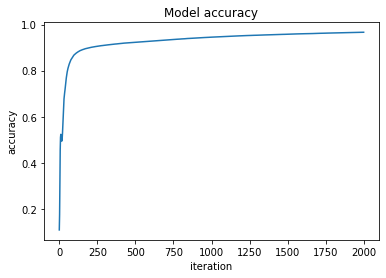

In [35]:
# Q5_graded

# Accuracy plot

plt.plot(report['accuracies'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.show()

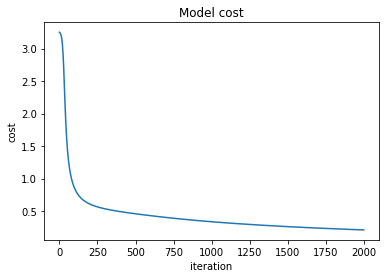

In [38]:
# Q5_graded

# Cost plot

plt.plot(report['costs'])
plt.title('Model cost')
plt.ylabel('cost')
plt.xlabel('iteration')
plt.show()

In [40]:
# Q5_graded

# MNIST test

y_predict, cache = forwardPropagate(X_test, parameters)
test_accuracy = computeAccuracy(y_predict, Y_test)
loss, test_cost = CEE(y_predict, Y_test)
print('Accuracy on test dataset:', test_accuracy)
print('Cost on test dataset:', test_cost)

Accuracy on test dataset: 0.9623
Cost on test dataset: 0.2286839220695887


# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID and use the following code to join the class: <font color='red'>**D5372R**</font>
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
    - **Note**: if you want to add more cells, add this to the **first** line of the cell:
  ```python
  # Q5_graded
  ```
  according to the question number.
  - There are 2 assignments in Gradescope:

    ![assignments](https://i.ibb.co/10GMhGM/Screen-Shot-2021-03-21-at-02-16-25.png)
  
    You should upload your **codes** and your **notebook** in `HW1` section and your final report for all of the questions as a **single pdf** file in `HW1 - Report`. Autograder will automatically check for:
    - `CI992_HW1.ipynb`
    - `Q1.py`
    - `Q2.py`
    - `Q4.py`
    - `Q5.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.